In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [3]:
data = pd.read_csv("F:/JupyterML/ML_Practice/datasets/mall_customer.csv")

In [4]:
data.head(4)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77


In [5]:
x = data.iloc[:,[3,4]].values

# Find Optimal number of cluster

In [6]:
from sklearn.cluster import KMeans

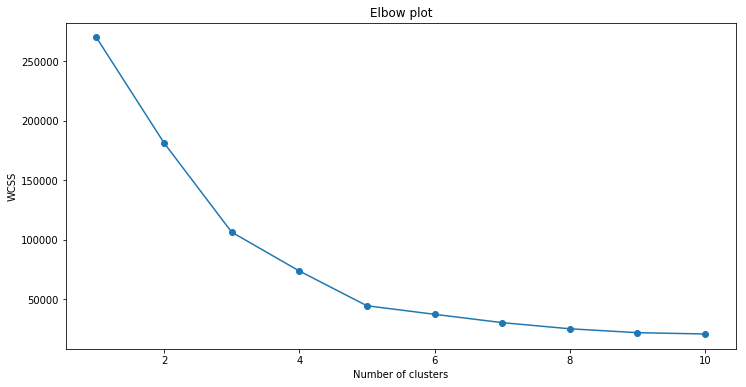

In [7]:
wcss =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300,n_init=10,random_state = 0 )
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss,marker='o')
plt.title("Elbow plot")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

# Applying K-means

In [8]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300,n_init=10,random_state = 0 )

In [9]:
y_kmeans = kmeans.fit_predict(x)

In [10]:
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

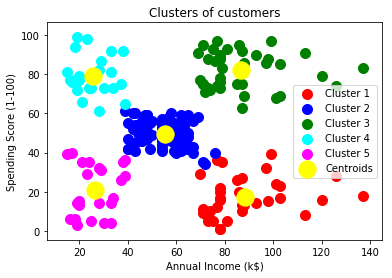

In [11]:
# Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Hierachical clustering

In [12]:
data = pd.read_csv("F:/JupyterML/ML_Practice/datasets/mall_customer.csv")
x = data.iloc[:,[3,4]].values

#Using dendogram to find optimal number of cluster

In [13]:
import scipy.cluster.hierarchy as sch

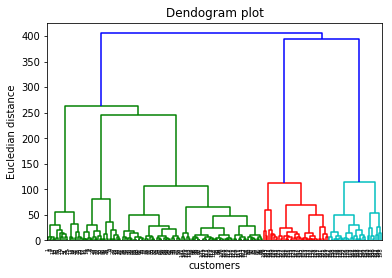

In [14]:
dendo = sch.dendrogram(sch.linkage(x,method='ward'))
plt.title("Dendogram plot")
plt.xlabel("customers")
plt.ylabel("Eucledian distance")
plt.show()

In [15]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

In [16]:
y_hc = hc.fit_predict(x)

In [17]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

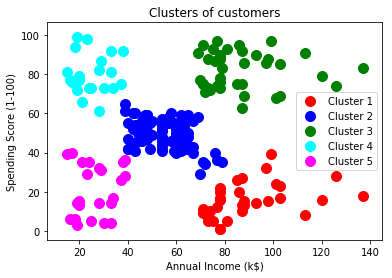

In [18]:
# Visualising the clusters
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Want to launch new beer to the market

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sn
%matplotlib

Using matplotlib backend: Qt5Agg


In [52]:
beer = pd.read_csv("F:/JupyterML/ML_Practice/datasets/beers.csv")

In [53]:
beer.head(4)

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0


In [54]:
beer.loc[beer['style'] == 'American Pale Wheat Ale'].head(5)

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
49,49,0.050,28.0,1870,Contact High,American Pale Wheat Ale,60,12.0
98,98,0.045,NaN,2577,Summer Wheat,American Pale Wheat Ale,35,12.0
132,132,0.062,17.0,390,Whitsun,American Pale Wheat Ale,541,12.0
169,169,0.048,23.0,1228,Mad Beach,American Pale Wheat Ale,360,12.0
205,205,0.047,NaN,1209,Summer Swelter,American Pale Wheat Ale,292,12.0


In [55]:
beer = beer[['abv','style','brewery_id','ounces']]
beer = beer.dropna()
beer.head(4)

,abv,style,brewery_id,ounces
0,0.050,American Pale Lager,408,12.0
1,0.066,American Pale Ale (APA),177,12.0
2,0.071,American IPA,177,12.0
3,0.090,American Double / Imperial IPA,177,12.0


In [56]:
beer.describe()

,abv,brewery_id,ounces
count,2346.000000,2346.000000,2346.000000
mean,0.059776,230.350384,13.593052
std,0.013547,156.214608,2.333117
min,0.001000,0.000000,8.400000
25%,0.050000,93.000000,12.000000
50%,0.056000,205.000000,12.000000
75%,0.067000,365.000000,16.000000
max,0.128000,557.000000,32.000000


In [57]:
beer.dtypes

abv           float64
style          object
brewery_id      int64
ounces        float64
dtype: object

In [58]:
beer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2346 entries, 0 to 2409
Data columns (total 4 columns):
abv           2346 non-null float64
style         2346 non-null object
brewery_id    2346 non-null int64
ounces        2346 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 91.6+ KB


In [35]:
beer['style'].value_counts()

American IPA                           417
American Pale Ale (APA)                239
American Amber / Red Ale               125
American Blonde Ale                    104
American Double / Imperial IPA         103
American Pale Wheat Ale                 95
American Brown Ale                      68
American Porter                         65
Saison / Farmhouse Ale                  52
Fruit / Vegetable Beer                  49
Witbier                                 49
Kölsch                                  42
Hefeweizen                              39
Cider                                   37
American Pale Lager                     37
American Stout                          37
German Pilsener                         36
American Black Ale                      35
Märzen / Oktoberfest                    29
Cream Ale                               28
American Amber / Red Lager              28
Czech Pilsener                          28
American Pilsner                        24
Pumpkin Ale

In [59]:
from sklearn.preprocessing import LabelEncoder
beer['style_en'] = LabelEncoder().fit_transform(beer['style'])

In [60]:
beer1 = beer

In [61]:
beer1.drop('style',axis=1,inplace=True)

In [62]:
beer1.head(4)

,abv,brewery_id,ounces,style_en
0,0.050,408,12.0,17
1,0.066,177,12.0,16
2,0.071,177,12.0,13
3,0.090,177,12.0,10


In [63]:
from sklearn.cluster import KMeans

In [64]:
x = beer1.iloc[:,0:].values

In [65]:
x

array([[5.00e-02, 4.08e+02, 1.20e+01, 1.70e+01],
       [6.60e-02, 1.77e+02, 1.20e+01, 1.60e+01],
       [7.10e-02, 1.77e+02, 1.20e+01, 1.30e+01],
       ...,
       [5.50e-02, 4.24e+02, 1.20e+01, 8.90e+01],
       [5.50e-02, 4.24e+02, 1.20e+01, 1.60e+01],
       [5.20e-02, 4.24e+02, 1.20e+01, 3.00e+00]])

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

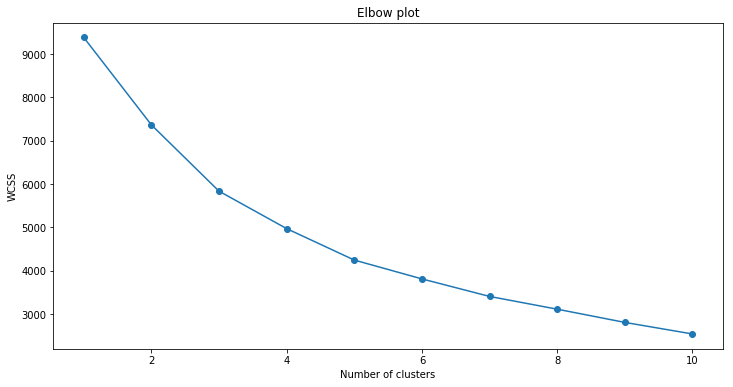

In [67]:
wcss =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300,n_init=10,random_state = 0 )
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss,marker='o')
plt.title("Elbow plot")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [87]:
clusters = KMeans(n_clusters=5, init='k-means++', max_iter=300,n_init=10,random_state = 0 )
clusters.fit(x_scaled)
y_scaled_kmeans = kmeans.fit_predict(x_scaled)

In [69]:
clusters.labels_

array([2, 3, 3, ..., 4, 2, 2])

In [70]:
beer["cluster_id"] = clusters.labels_

In [73]:
beer.head(4)

,abv,brewery_id,ounces,style_en,cluster_id
0,0.050,408,12.0,17,2
1,0.066,177,12.0,16,3
2,0.071,177,12.0,13,3
3,0.090,177,12.0,10,0


In [74]:
clusters.cluster_centers_

array([[ 1.99300223, -0.15682568,  0.39195156, -0.07390908],
       [-0.10052668, -0.67887834,  1.29680688, -0.3489719 ],
       [-0.27194475,  1.21379502, -0.25756616, -0.50474383],
       [-0.23126487, -0.56795036, -0.6829454 , -0.56585633],
       [-0.42780211,  0.12311425, -0.17838896,  1.56165474]])

In [76]:
beer.groupby('cluster_id' ).mean()

,abv,brewery_id,ounces,style_en
cluster_id,,,,
0,0.086769,205.857143,14.507326,29.673993
1,0.058415,124.322275,16.618009,21.763033
2,0.056093,419.922481,12.992248,17.282946
3,0.056644,141.647152,12.000000,15.525316
4,0.053982,249.578529,13.176938,76.713718


# Let's look at each segment one by one

In [78]:
beer_0 = beer[['abv', 'brewery_id', 'ounces', 'style_en','cluster_id' ]][beer.cluster_id == 0]

In [79]:
beer_0.head(4)

,abv,brewery_id,ounces,style_en,cluster_id
3,0.090,177,12.0,10,0
9,0.086,177,12.0,10,0
13,0.085,177,12.0,27,0
19,0.082,368,12.0,25,0


In [81]:
beer_1 = beer[['abv', 'brewery_id', 'ounces', 'style_en','cluster_id' ]][beer.cluster_id == 1]
beer_2 = beer[['abv', 'brewery_id', 'ounces', 'style_en','cluster_id' ]][beer.cluster_id == 2]
beer_3 = beer[['abv', 'brewery_id', 'ounces', 'style_en','cluster_id' ]][beer.cluster_id == 3]
beer_4 = beer[['abv', 'brewery_id', 'ounces', 'style_en','cluster_id' ]][beer.cluster_id == 4]

In [82]:
beer_1.head(4)

,abv,brewery_id,ounces,style_en,cluster_id
50,0.065,27,16.0,13,1
51,0.050,27,16.0,13,1
53,0.069,27,16.0,13,1
56,0.052,27,16.0,26,1


In [83]:
beer_2.head(4)

,abv,brewery_id,ounces,style_en,cluster_id
0,0.050,408,12.0,17,2
24,0.044,368,12.0,16,2
28,0.070,368,12.0,13,2
29,0.070,368,12.0,13,2


In [84]:
beer_3.head()

,abv,brewery_id,ounces,style_en,cluster_id
1,0.066,177,12.0,16,3
2,0.071,177,12.0,13,3
4,0.075,177,12.0,13,3
6,0.045,177,12.0,16,3
7,0.065,177,12.0,20,3


In [86]:
beer_4.head(4)

,abv,brewery_id,ounces,style_en,cluster_id
5,0.077,177,12.0,78,4
10,0.072,177,12.0,88,4
11,0.073,177,12.0,88,4
12,0.069,177,12.0,88,4


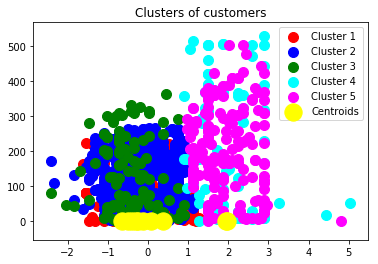

In [88]:
# Visualising the clusters
plt.scatter(x_scaled[y_scaled_kmeans == 0, 0], x[y_scaled_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x_scaled[y_scaled_kmeans == 1, 0], x[y_scaled_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x_scaled[y_scaled_kmeans == 2, 0], x[y_scaled_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x_scaled[y_scaled_kmeans == 3, 0], x[y_scaled_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x_scaled[y_scaled_kmeans == 4, 0], x[y_scaled_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

In [89]:
import scipy.cluster.hierarchy as sch

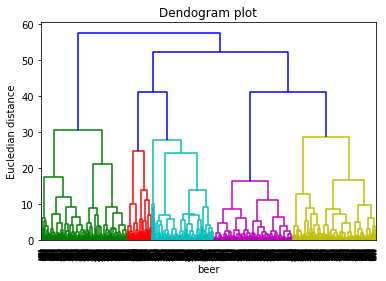

In [91]:
dendo = sch.dendrogram(sch.linkage(x_scaled,method='ward'))
plt.title("Dendogram plot")
plt.xlabel("beer")
plt.ylabel("Eucledian distance")
plt.show()

In [93]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

In [94]:
y_beer_hc = hc.fit_predict(x_scaled)

In [95]:
y_beer_hc

array([2, 3, 3, ..., 0, 2, 2], dtype=int64)